In [1]:
#packages import
import pandas as pd
import scipy
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#creating a data frame and visualization of the data
data=pd.read_csv('raw_dataset_CERTandHeLa_SMCerGlcCer.csv')
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)
data

,CP0_ID.BR,CP0_ID.mode.BR,CP0_ID,GENE,BR,Good_bad,CP_plate,batch,Toxic,Series_p2,...,GlcDHCer38:1,GlcDHCer40:0,GlcDHCer40:0-OH,GlcDHCer40:1,GlcDHCer42:0,GlcDHCer42:0-OH,GlcDHCer42:1,GlcDHCer44:0,GlcDHCer44:0-OH,GlcDHCer44:1
0,CP0003_1,CP0003_p2_1_A.2,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.66,2.06,2.45,3.38,4.73,4.78,7.88,0.61,0.62,0.8
1,CP0003_1,CP0003_p2_1_A.1,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,0.72,1.63,2.43,2.45,3.88,4.54,6.42,1.47,1.39,1.32
2,CP0003_1,CP0003_p2_1_B.3,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,2.54,1.23,1.25,1.72,2.41,3.39,4.36,0.71,0.88,1.14
3,CP0003_1,CP0003_p2_1_A.3,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.93,3.33,2.42,2.19,4.12,3.53,7.12,1.43,1.29,1.41
4,CP0003_1,CP0003_p2_1_B.1,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.97,1.41,1.58,2.27,3.64,2.3,6.68,0.69,1.84,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,CP0912_2,CP0912_p1_2_A.2,CP0912,CERT,BR2,Bad,CP010,CP010_BR2,no,19,...,?,?,?,?,?,?,?,?,?,?
668,CP0912_2,CP0912_p1_2_A.3,CP0912,CERT,BR2,Bad,CP010,CP010_BR2,no,19,...,?,?,?,?,?,?,?,?,?,?
669,CP0912_2,CP0912_p1_2_B.1,CP0912,CERT,BR2,Bad,CP010,CP010_BR2,no,19,...,?,?,?,?,?,?,?,?,?,?
670,CP0912_2,CP0912_p1_2_B.2,CP0912,CERT,BR2,Bad,CP010,CP010_BR2,no,19,...,?,?,?,?,?,?,?,?,?,?


CP0_ID.BR          object
CP0_ID.mode.BR     object
CP0_ID             object
GENE               object
BR                 object
                    ...  
GlcDHCer42:0-OH    object
GlcDHCer42:1       object
GlcDHCer44:0       object
GlcDHCer44:0-OH    object
GlcDHCer44:1       object
Length: 205, dtype: object

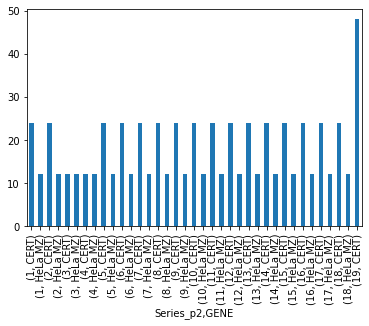

In [3]:
#Plot to see amount of measures in each series for each gene 
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()
data.dtypes

In [4]:
#Eliminate Cer 1P from the dataset
data = data[data.columns.drop(list(data.filter(regex='CerP')))]

In [5]:
#Filtering all the same lipids in one column / grouped by the name of lipids
feature_SM = [col for col in data if col.startswith('SM')]
feature_GlcCer = [col for col in data if col.startswith('Glc')]
feature_Cer = [col for col in data if col.startswith('DHCer')] + [col for col in data if col.startswith('Cer')]

lipids=feature_SM+feature_GlcCer+feature_Cer



In [6]:
#Creating the SM dataset / filtering of the ? values according to the C12SM standart
data_SM = data[['GENE','Series_p2', 'C12SM']+feature_SM]
data_SM = data_SM[data_SM['C12SM'] != '?']
data_SM = data_SM[['GENE','Series_p2']+feature_SM]
data_SM

,GENE,Series_p2,SM28:0,SM28:1,SM28:2,SM30:0,SM30:0-OH,SM30:1-OH,SM30:2,SM30:2-OH,...,SM42:1-OH,SM42:2,SM42:2-OH,SM42:3,SM42:3-OH,SM44:0,SM44:1,SM44:2,SM44:2+(H2O),SM44:3
0,HeLa MZ,1,17.04,47.65,12.51,1352.76,29.05,36.18,20.24,60.93,...,349.87,11359.2,676.52,2340.19,565.08,55.99,124.08,138.12,25.32,57.97
1,HeLa MZ,1,13.53,41.74,11.09,1281.02,23.84,37.1,17.46,47.43,...,312.09,10633.99,659.79,2052.77,529.43,61.17,128.79,125.37,15.52,57.57
2,HeLa MZ,1,15.91,66.7,18.76,1313.95,28.3,33.34,15.34,66.95,...,324.05,10399.61,724.84,1880.78,546.27,69.35,109.87,141.63,16.02,50.11
3,HeLa MZ,1,19.05,36.28,13.26,1264.04,21.43,31.13,11.9,61.96,...,308.22,9883.43,607.89,2081.35,496.63,57.69,96.86,137.44,20.24,51.27
4,HeLa MZ,1,15.85,58.6,21.48,1373.49,23.35,35.16,18.75,59.01,...,272.21,8931.71,632.74,1775.69,468.67,60.4,96.77,134.67,17.59,53.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,CERT,19,2.96,20.82,1.25,1409.53,1.87,29.61,9.37,0.8,...,193.78,262.85,4.68,73.46,73.41,41.36,26.61,10.85,4.97,5.58
662,CERT,19,38.92,37.16,8.85,1057.48,13.71,444.48,180.24,11.38,...,5032.92,8791.47,32.28,540.67,1750.39,74.93,168.58,180.61,35.42,85.58
663,CERT,19,3.33,31.96,1.99,1580.28,2.34,23.4,9.96,0.97,...,1864.86,3516.08,29.82,194.5,1042.64,31.87,57.03,69.5,14.4,28.91
664,CERT,19,2.51,19.19,1.12,1227.9,2.75,15.97,8.74,1.33,...,1480.06,2372.76,21.33,153.9,633.84,18.57,40.85,48.95,14.04,22.86


In [7]:
#Transforming the lipids group from object to number / converting the NaNs to 0
data_SM[feature_SM] = data_SM[feature_SM].apply(pd.to_numeric, errors='coerce')
data_SM[feature_SM] = data_SM[feature_SM].replace(np.nan, 0)
data_SM['Series_p2'] = data_SM['Series_p2'].astype(str)
data_SM.dtypes

GENE             object
Series_p2        object
SM28:0          float64
SM28:1          float64
SM28:2          float64
                 ...   
SM44:0          float64
SM44:1          float64
SM44:2          float64
SM44:2+(H2O)    float64
SM44:3          float64
Length: 64, dtype: object

In [8]:
#Separate data Hela and CERT for SM
cert_SM=data_SM[data_SM['GENE']=="CERT"]
hela_SM=data_SM[data_SM['GENE']=="HeLa MZ"]

In [9]:
# Reseting index for cert
pd.set_option('display.max_rows', 800)
cert_SM = cert_SM.reset_index()
cert_SM = cert_SM.drop(['index'], axis=1)
cert_SM

,GENE,Series_p2,SM28:0,SM28:1,SM28:2,SM30:0,SM30:0-OH,SM30:1-OH,SM30:2,SM30:2-OH,...,SM42:1-OH,SM42:2,SM42:2-OH,SM42:3,SM42:3-OH,SM44:0,SM44:1,SM44:2,SM44:2+(H2O),SM44:3
0,CERT,1,11.82,36.19,8.82,1298.60,16.03,23.26,13.75,37.29,...,374.11,4535.00,517.07,1104.72,263.07,30.88,58.31,70.84,14.30,30.19
1,CERT,1,8.23,39.22,8.52,1335.69,19.37,24.26,14.68,42.86,...,511.21,5852.05,767.40,1288.44,264.14,44.76,83.12,78.71,16.25,34.18
2,CERT,1,9.57,39.30,10.37,1273.96,14.08,27.34,13.73,38.54,...,448.47,5567.59,651.42,1220.89,307.35,33.22,76.86,76.26,16.53,30.42
3,CERT,1,9.99,32.55,8.88,1335.65,13.65,23.25,15.57,38.73,...,448.65,5338.52,622.32,1022.48,280.34,28.09,65.66,77.49,15.14,30.21
4,CERT,1,8.41,31.68,5.32,1602.00,16.16,24.07,14.70,46.51,...,538.64,6681.39,713.15,1339.77,352.64,36.36,83.31,90.87,21.24,34.85
5,CERT,1,12.12,34.67,11.04,1413.50,16.73,25.99,11.06,36.98,...,426.50,5325.04,616.81,1288.57,296.02,45.37,74.09,86.78,21.01,37.36
6,CERT,2,20.23,59.69,14.20,1158.10,8.82,30.69,18.83,51.54,...,257.68,3724.44,343.03,918.60,200.73,28.61,63.74,79.99,10.72,28.23
7,CERT,2,27.34,62.49,14.98,1350.89,8.27,40.07,17.94,56.59,...,336.70,4456.38,457.03,942.76,231.17,30.88,73.07,79.20,13.89,36.43
8,CERT,2,21.12,56.27,19.65,1380.41,11.65,35.35,20.77,53.52,...,257.03,3944.23,355.60,879.62,212.18,29.62,58.30,75.24,12.37,27.17
9,CERT,2,22.87,54.37,15.62,1267.23,9.54,39.95,13.05,52.10,...,225.86,3829.56,347.13,810.93,191.64,29.13,66.91,60.85,9.66,26.51


In [33]:
# Reseting index for Hela
pd.set_option('display.max_rows', 800)
hela_SM = hela_SM.reset_index()
hela_SM = hela_SM.drop(['index'], axis=1)
hela_SM

,GENE,Series_p2,SM28:0,SM28:1,SM28:2,SM30:0,SM30:0-OH,SM30:1-OH,SM30:2,SM30:2-OH,...,SM42:1-OH,SM42:2,SM42:2-OH,SM42:3,SM42:3-OH,SM44:0,SM44:1,SM44:2,SM44:2+(H2O),SM44:3
0,HeLa MZ,1,17.04,47.65,12.51,1352.76,29.05,36.18,20.24,60.93,...,349.87,11359.20,676.52,2340.19,565.08,55.99,124.08,138.12,25.32,57.97
1,HeLa MZ,1,13.53,41.74,11.09,1281.02,23.84,37.10,17.46,47.43,...,312.09,10633.99,659.79,2052.77,529.43,61.17,128.79,125.37,15.52,57.57
2,HeLa MZ,1,15.91,66.70,18.76,1313.95,28.30,33.34,15.34,66.95,...,324.05,10399.61,724.84,1880.78,546.27,69.35,109.87,141.63,16.02,50.11
3,HeLa MZ,1,19.05,36.28,13.26,1264.04,21.43,31.13,11.90,61.96,...,308.22,9883.43,607.89,2081.35,496.63,57.69,96.86,137.44,20.24,51.27
4,HeLa MZ,1,15.85,58.60,21.48,1373.49,23.35,35.16,18.75,59.01,...,272.21,8931.71,632.74,1775.69,468.67,60.40,96.77,134.67,17.59,53.11
5,HeLa MZ,1,21.79,62.13,21.79,1360.42,38.50,39.85,21.31,56.10,...,328.27,9409.75,666.27,1993.68,501.08,61.74,127.10,122.12,18.07,48.33
6,HeLa MZ,2,16.16,55.58,15.66,1454.41,7.79,37.11,19.78,46.67,...,220.27,7339.64,507.39,1301.60,451.32,56.21,97.67,131.94,10.40,53.78
7,HeLa MZ,2,11.44,42.12,10.25,1305.56,8.96,26.09,13.14,46.11,...,159.25,10645.47,385.74,2113.40,325.36,42.70,79.68,81.47,9.24,33.69
8,HeLa MZ,2,16.53,70.41,17.85,1336.16,9.47,37.05,20.93,62.71,...,605.28,25140.94,1383.54,4085.01,1111.12,70.90,117.19,223.63,29.63,137.74
9,HeLa MZ,2,12.41,48.30,5.98,1317.80,12.83,28.79,15.56,54.49,...,162.87,5522.86,395.32,1240.96,381.87,44.65,72.50,95.54,11.37,39.36


In [10]:
# Separating out the features in cert SM
cert_x = cert_SM.loc[:, feature_SM].values

# Separating out the target in cert SM
cert_y = cert_SM.loc[:,['Series_p2']].values

In [34]:
# Separating out the features in Hela SM
hela_x = hela_SM.loc[:, feature_SM].values

# Separating out the target in Hela SM
hela_y = hela_SM.loc[:,['Series_p2']].values

In [11]:
# Standardizing the features in cert SM
cert_x = StandardScaler().fit_transform(cert_x)

In [35]:
# Standardizing the features in hela SM
hela_x = StandardScaler().fit_transform(hela_x)

In [36]:
#PCA on cert
pca_certSM = PCA(n_components=5)
principalComponents_certSM = pca_certSM.fit_transform(cert_x)
certSM_principalDf = pd.DataFrame(data = principalComponents_certSM
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [39]:
#PCA on hela
pca_helaSM = PCA(n_components=5)
principalComponents_helaSM = pca_helaSM.fit_transform(hela_x)
helaSM_principalDf = pd.DataFrame(data = principalComponents_helaSM
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [45]:
#Shape on CERT PCA
certSM_principalDf.shape

(392, 5)

In [44]:
#Shape on Hela PCA
helaSM_principalDf.shape

(167, 5)

In [23]:
#Concatenation of CERT PCA dataframe with Series_p2 labels
certSM_finalDf = pd.concat([certSM_principalDf, cert_SM[['Series_p2']]], axis = 1)
certSM_finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Series_p2
0,-0.324946,-1.510409,1.358526,0.329100,-2.682559,1
1,0.064294,-1.902557,1.666805,0.413372,-2.899473,1
2,-0.109094,-1.767829,1.602973,0.408904,-2.891101,1
3,-0.222121,-1.479275,1.387695,0.379975,-2.459018,1
4,0.095670,-2.061959,1.803688,0.567845,-3.292978,1
5,-0.091069,-1.678766,1.429587,0.416499,-2.582683,1
6,-0.675535,-1.084229,1.065635,0.231834,-2.412413,2
7,-0.423195,-1.414187,1.181437,0.282885,-2.935022,2
8,-0.618248,-1.236924,1.155318,0.294683,-2.549895,2
9,-0.698226,-1.034701,0.998418,0.236665,-2.293237,2


In [46]:
#Concatenation of Hela PCA dataframe with Series_p2 labels
helaSM_finalDf = pd.concat([helaSM_principalDf, hela_SM[['Series_p2']]], axis = 1)
helaSM_finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Series_p2
0,0.963805,-0.984272,3.679932,-0.197518,-0.840472,1
1,0.693359,-0.914804,3.390754,-0.510475,-0.891798,1
2,0.609830,-0.999133,3.487853,0.328346,-0.913653,1
3,0.749367,-0.916928,3.431098,-0.408039,-0.974192,1
4,0.529097,-0.969301,3.270246,0.328081,-0.984012,1
5,0.892751,-1.095674,3.811311,0.666099,-0.960861,1
6,-0.926584,-0.614333,1.522310,0.092974,-0.674471,2
7,-0.064821,-0.596581,2.556951,-0.705385,-1.070644,2
8,2.093686,-1.021285,4.330919,-0.273829,0.157784,2
9,0.391236,-0.711560,3.065567,-0.535561,-1.444030,2


In [32]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(cert_SM[:, 0], cert_SM[:, 1], alpha=0.2)
for length, vector in zip(pca_certSM.explained_variance_, pca_certSM.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_certSM.mean_, pca_certSM.mean_ + v)
plt.axis('equal');

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [24]:
# CERT Explained Variance:The explained variance tells you how much information (variance) can be attributed to each of the principal components.
print('Explained variation per principal component: {}'.format(pca_certSM.explained_variance_ratio_))

Explained variation per principal component: [0.33207599 0.15720565 0.13498526 0.11407746 0.06120014]


In [47]:
# Hela Explained Variance
print('Explained variation per principal component: {}'.format(pca_helaSM.explained_variance_ratio_))

Explained variation per principal component: [0.33231536 0.26481725 0.09287287 0.07252071 0.06350853]


In [16]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

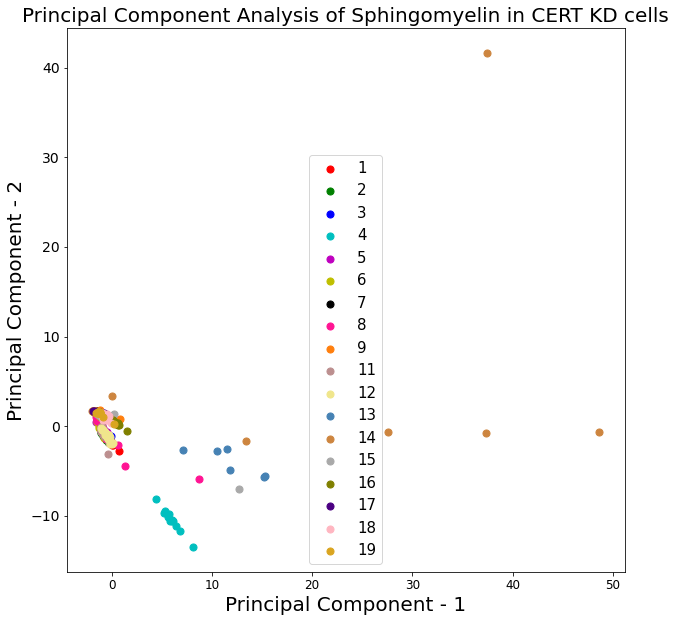

In [28]:
#Plot CERT PCA all the batches
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Sphingomyelin in CERT KD cells",fontsize=20)
targets = ['1','2','3','4','5','6','7','8','9','11','12','13','14','15','16','17','18','19']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'tab:orange', 'rosybrown', 'khaki', 'steelblue', 'peru', 'darkgray','olive','indigo', 'lightpink', 'goldenrod', 'tan']
for target, color in zip(targets,colors):
    indicesToKeep = cert_SM['Series_p2'] == target
    plt.scatter(certSM_principalDf.loc[indicesToKeep, 'principal component 1']
               , certSM_principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

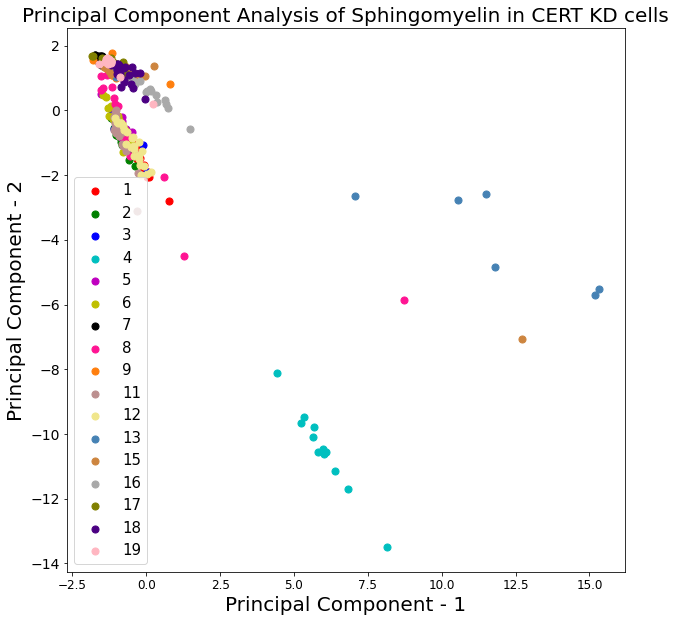

In [18]:
#Plot CERT PCA minus batch 14
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Sphingomyelin in CERT KD cells",fontsize=20)
targets = ['1','2','3','4','5','6','7','8','9','11','12','13','15','16','17','18','19']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'tab:orange', 'rosybrown', 'khaki', 'steelblue', 'peru', 'darkgray','olive','indigo', 'lightpink', 'goldenrod', 'tan']
for target, color in zip(targets,colors):
    indicesToKeep = cert_SM['Series_p2'] == target
    plt.scatter(certSM_principalDf.loc[indicesToKeep, 'principal component 1']
               , certSM_principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

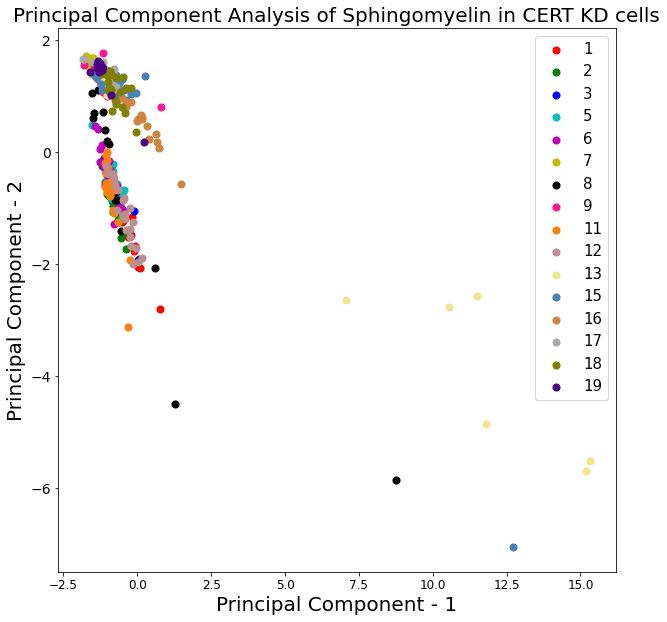

In [19]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Sphingomyelin in CERT KD cells",fontsize=20)
targets = ['1','2','3','5','6','7','8','9','11','12','13','15','16','17','18','19']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'tab:orange', 'rosybrown', 'khaki', 'steelblue', 'peru', 'darkgray','olive','indigo', 'lightpink', 'goldenrod', 'tan']
for target, color in zip(targets,colors):
    indicesToKeep = cert_SM['Series_p2'] == target
    plt.scatter(certSM_principalDf.loc[indicesToKeep, 'principal component 1']
               , certSM_principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

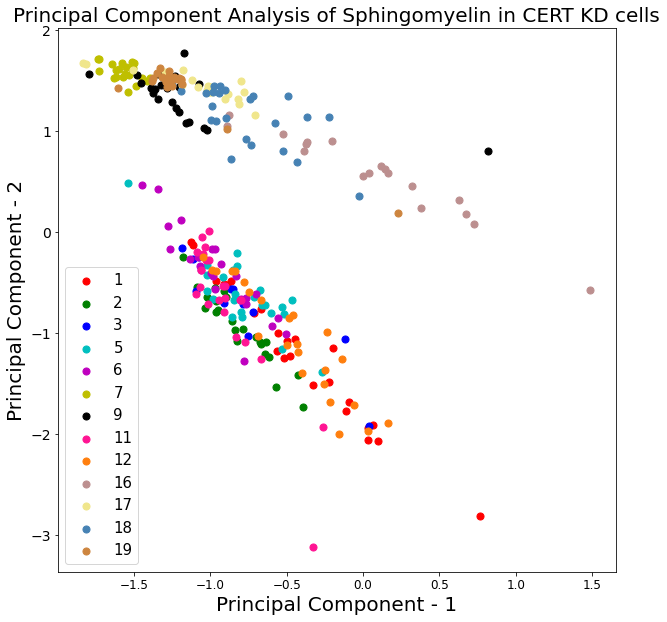

In [20]:
#Plot CERT PCA minus batch 14, 13, 4, 8
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Sphingomyelin in CERT KD cells",fontsize=20)
targets = ['1','2','3','5','6','7','9','11','12','16','17','18','19']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'tab:orange', 'rosybrown', 'khaki', 'steelblue', 'peru', 'darkgray','olive','indigo', 'lightpink', 'goldenrod', 'tan']
for target, color in zip(targets,colors):
    indicesToKeep = cert_SM['Series_p2'] == target
    plt.scatter(certSM_principalDf.loc[indicesToKeep, 'principal component 1']
               , certSM_principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

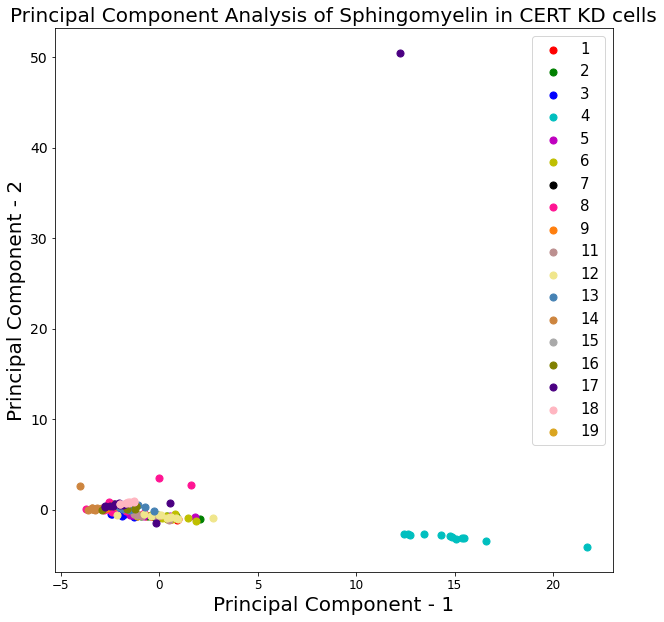

In [48]:
#Plot Hela PCA all the batches
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Sphingomyelin in CERT KD cells",fontsize=20)
targets = ['1','2','3','4','5','6','7','8','9','11','12','13','14','15','16','17','18','19']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'tab:orange', 'rosybrown', 'khaki', 'steelblue', 'peru', 'darkgray','olive','indigo', 'lightpink', 'goldenrod', 'tan']
for target, color in zip(targets,colors):
    indicesToKeep = hela_SM['Series_p2'] == target
    plt.scatter(helaSM_principalDf.loc[indicesToKeep, 'principal component 1']
               , helaSM_principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

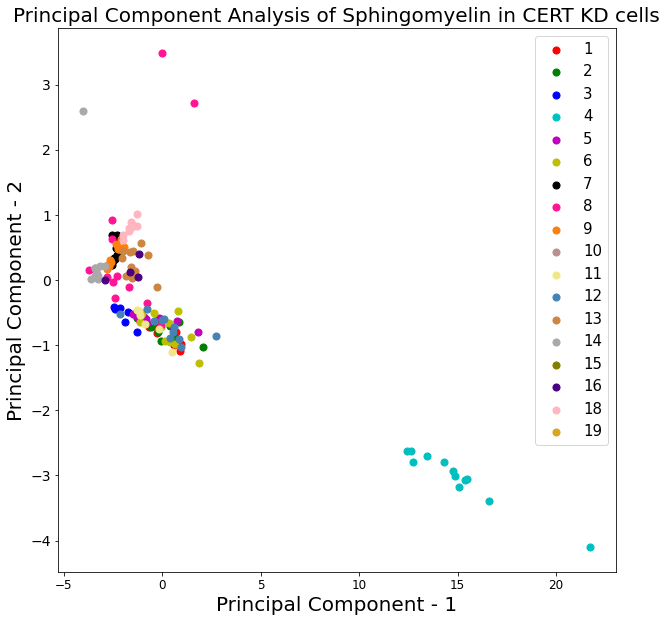

In [50]:
#Plot Hela PCA minus batch 17
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Sphingomyelin in CERT KD cells",fontsize=20)
targets = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','18','19']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'tab:orange', 'rosybrown', 'khaki', 'steelblue', 'peru', 'darkgray','olive','indigo', 'lightpink', 'goldenrod', 'tan']
for target, color in zip(targets,colors):
    indicesToKeep = hela_SM['Series_p2'] == target
    plt.scatter(helaSM_principalDf.loc[indicesToKeep, 'principal component 1']
               , helaSM_principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

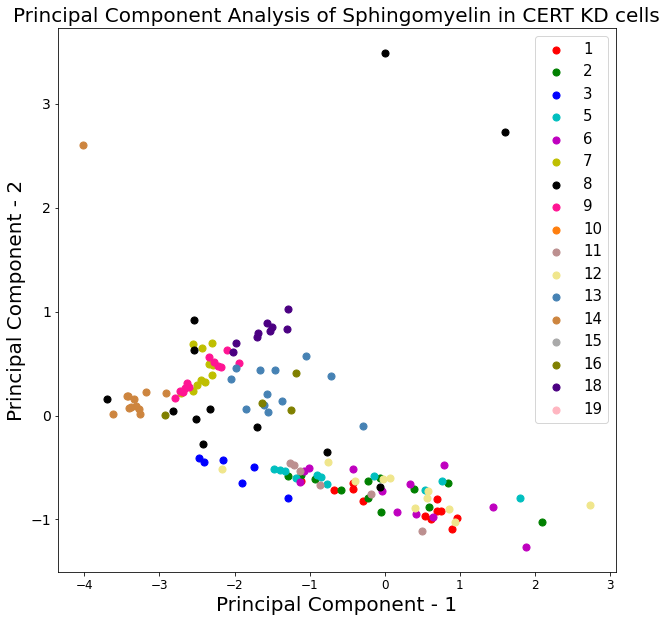

In [51]:
#Plot Hela PCA minus batch 17 and 4
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Sphingomyelin in CERT KD cells",fontsize=20)
targets = ['1','2','3','5','6','7','8','9','10','11','12','13','14','15','16','18','19']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'tab:orange', 'rosybrown', 'khaki', 'steelblue', 'peru', 'darkgray','olive','indigo', 'lightpink', 'goldenrod', 'tan']
for target, color in zip(targets,colors):
    indicesToKeep = hela_SM['Series_p2'] == target
    plt.scatter(helaSM_principalDf.loc[indicesToKeep, 'principal component 1']
               , helaSM_principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})